In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### 두개의 데이터 셋
- primary : 미국내 주-카운터별 각 정당, 후보자의 데이터와 득표율 데이터
- counties : primary의 칼럼 중 fips라는 코드를 식별자로 하여 각 유권자별 데이터

In [2]:
# 데이터 불러오기, encoding = 'utf-8', sep = ','
primary = pd.read_csv('D:/python3/data/primary_results.csv')
counties = pd.read_csv('D:/python3/data/county_facts.csv')

### Preprocessing : 전처리
### EDA(탐색적 데이터 분석)

In [3]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [4]:
primary.shape

(13212, 8)

In [6]:
primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13212 entries, 0 to 13211
Data columns (total 8 columns):
state                 13212 non-null object
state_abbreviation    13212 non-null object
county                13212 non-null object
fips                  13212 non-null int64
party                 13212 non-null object
candidate             13212 non-null object
votes                 13212 non-null int64
fraction_votes        13212 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 825.8+ KB


In [8]:
counties.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [9]:
primary.columns

Index(['state', 'state_abbreviation', 'county', 'fips', 'party', 'candidate',
       'votes', 'fraction_votes'],
      dtype='object')

In [10]:
counties.columns

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [11]:
counties.shape

(3195, 54)

### 1. 각 후보별 전체지역 득표수를 구하시오.
- candidate : 후보자
- vote : 득표수

In [12]:
# ~ 별 ~ 계산한다 => ~ 별 : group을 잡아야 한다., ~ 계산한다 : 통계
# 통계량을 계산할 컬럼명.groupby('그룹화할 기준컬럼명')
# step1. candidate의 unique 확인
primary['candidate'].unique()

array(['Donald Trump', 'Ted Cruz', 'Marco Rubio', 'Ben Carson',
       'John Kasich', 'Hillary Clinton', 'Bernie Sanders',
       'Carly Fiorina', 'Rand Paul', 'Mike Huckabee', 'Rick Santorum',
       'Jeb Bush', 'Chris Christie', "Martin O'Malley", ' Uncommitted',
       ' No Preference'], dtype=object)

In [13]:
# step2. candidate별 득표수의 합계
candidate_to_votes_s = primary.groupby('candidate')['votes'].sum().
candidate_to_votes_s

candidate
 No Preference         313
 Uncommitted            43
Ben Carson          528463
Bernie Sanders     4740278
Carly Fiorina        15181
Chris Christie       24347
Donald Trump       6944654
Hillary Clinton    7178257
Jeb Bush             94394
John Kasich        2456406
Marco Rubio        2998335
Martin O'Malley        747
Mike Huckabee         3300
Rand Paul             8460
Rick Santorum         1773
Ted Cruz           5248807
Name: votes, dtype: int64

In [17]:
# step3. 득표수별로 오름차순, 내림차순으로 정렬하는 작업
candidate_to_votes_s = primary.groupby('candidate')['votes'].sum().sort_values()
candidate_to_votes_s

candidate
 Uncommitted            43
 No Preference         313
Martin O'Malley        747
Rick Santorum         1773
Mike Huckabee         3300
Rand Paul             8460
Carly Fiorina        15181
Chris Christie       24347
Jeb Bush             94394
Ben Carson          528463
John Kasich        2456406
Marco Rubio        2998335
Bernie Sanders     4740278
Ted Cruz           5248807
Donald Trump       6944654
Hillary Clinton    7178257
Name: votes, dtype: int64

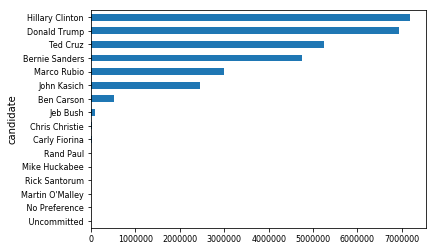

In [18]:
# step4. 후보별 전체지역 득표수를 정렬한 결과를 이용하여 수평막대 그래프
candidate_to_votes_s.plot(kind='barh', fontsize = 8)

### 2. 각 주별, 공화당과 민주당의 득표비율을 계산하시오.
- state : 주
- party : 정당

In [31]:
# 다중 인덱스를 이용해서 작업
# 각 주별 -> state 기준열
# 공화당과 민주당 -> party  기준열2
# 득표수 : votes
# 득표비율 = 해당득표수 / 전체득표수
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [40]:
sum = primary['votes'].groupby(primary['party']).sum()
sum

party
Democrat      11919638
Republican    18324120
Name: votes, dtype: int64

In [53]:
# 득표 비율
entire_votes = primary['votes'].sum()
state_party_to_votes_pct = primary['votes'].groupby(primary['party']).sum() /entire_votes *100

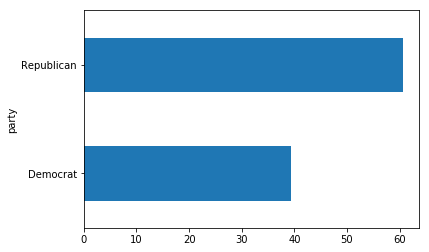

In [54]:
state_party_to_votes_pct.plot(kind='barh', stacked = True)
# 이러면 각 주별이 계산이 되지 않은거다. 

In [55]:
# step1. 각 주별 - 공화당/민주당- 득표수의 합
state_party_votes_s = primary.groupby(['state','party'])['votes'].sum()

In [56]:
# step2. 비율을 구하기 위해 각 주의 전체 득표수를
state_to_votes_s = primary.groupby('state')['votes'].sum()

In [57]:
# step3. step1에서 구한 Series를 step2에서 구한 Series로 나눠준다.
# 일반적으로 계층적인 인덱스를 이용하여 연산을 수행할 때 첫번째 인덱스가 기준
state_party_to_votes_pct = state_party_votes_s / state_to_votes_s
state_party_to_votes_pct.head()

state     party     
Alabama   Democrat      0.321491
          Republican    0.678509
Arizona   Democrat      0.478419
          Republican    0.521581
Arkansas  Democrat      0.343990
Name: votes, dtype: float64

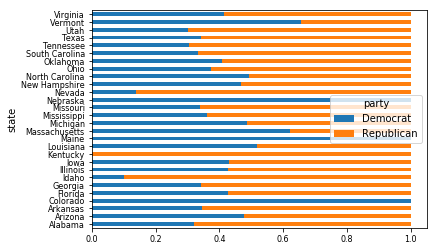

In [58]:
# step4. 비율을 시각화
# 멀티인덱스를 시각화할 때 unstack()를 이용하여 하위인덱스를 컬럼으로 올린다
state_party_to_votes_pct.unstack().plot(kind='barh', stacked=True, fontsize=8)

### 3. 사용자 정의 함수을 활용하여 각 county별, 당성된 후보의 백인유권자 비율을 계산하시오.
- 유권자 : fips
- 정당 : party
- 후보자 : candidate

In [59]:
# 당선된 후보 = 득표수가 많은 후보 = 투표열을 내림차순 정렬 1번째
func = lambda agg_df : agg_df.sort_values(by = 'votes', ascending = False).iloc[0]

In [60]:
primary.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001,Republican,Donald Trump,5387,0.445
1,Alabama,AL,Autauga,1001,Republican,Ted Cruz,2482,0.205
2,Alabama,AL,Autauga,1001,Republican,Marco Rubio,1785,0.148
3,Alabama,AL,Autauga,1001,Republican,Ben Carson,1764,0.146
4,Alabama,AL,Autauga,1001,Republican,John Kasich,421,0.035


In [63]:
winners = primary.groupby('fips').agg(func)
winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
fips,,,,,,,
1001,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445
1003,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469
1005,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906
1007,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494
1009,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487


In [62]:
counties['RHI825214'].head()

0    62.1
1    66.2
2    75.6
3    83.0
4    46.6
Name: RHI825214, dtype: float64

In [64]:
winners_county_races = pd.merge(winners, counties[['fips', 'RHI825214']], 
                               left_index = True, right_on = 'fips', 
                               how = 'left')
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,RHI825214
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [65]:
# 득표율
winners_county_races = winners_county_races.rename(columns= {'RHI825214':'white_pct'})
winners_county_races.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,fips,white_pct
2,Alabama,AL,Autauga,Republican,Donald Trump,5387,0.445,1001,75.6
3,Alabama,AL,Baldwin,Republican,Donald Trump,23618,0.469,1003,83.0
4,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,1005,46.6
5,Alabama,AL,Bibb,Republican,Donald Trump,1959,0.494,1007,74.5
6,Alabama,AL,Blount,Republican,Donald Trump,7390,0.487,1009,87.8


In [69]:
# party와 candidate를 그룹화 후, 백인유권자의 비율에 대한 평균
winners_county_white_pct = winners_county_races.groupby(['party', 'candidate'])['white_pct'].mean()

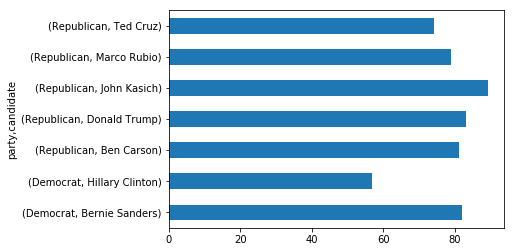

In [70]:
winners_county_white_pct.plot(kind= 'barh')